# Demonstration of Univariate Time Series Forecasting (Long Short-Term Memory (LSTM) Network )  --  Preprocessing (Missing Values/Data Cleaning) --  Keras Time Series Generator 

**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**---------------------------------------------------**

**STRUCTURE**

*The first part of this demonstration (**PART A**) is focused on data preparation with respect to the imported '.csv' file in order to track and handle missing values and to convert the data into a clean dataset (Data Cleaning/Preprocessing).*

*The second part of this project (**Part B**) comprises **Case Study** **I** and **II**. The scope of **Case Study I** is to use the average Monthly Minimum Temperature dataset (dataset has been grouped by the mean Monthly Minimum Temperature) so as to investigate and assess **a)** the LSTM model predictive capabilities by training this deep learning neural network with 9 years of past average monthly data from the 'MonthlyMinTemp' feature to predict the average Monthly Minimum Temperature values of the next 12 months and **b)** the LSTM forecasting capabilities by training the machine learning model with all dataset samples to forecast the average Minimum Temperature values for a prediction horizon of 12 months (future sequence of observations). In **Case Study** **II**, there is an increase in the size of the training set(dataset has been grouped by the mean Weekly Minimum Temperature) and the model predictive capabilities are investigated by training the LSTM with approximately 8.5 year of past average Weekly Miminum Temperature data to predict the average Weekly Minimum Temperature values for a prediction horizon of 1.5 year(78 weeks).*

*The evaluation of the LSTM model performance for the cases where the prediction horizon is known is based on the comparison of the forecasted values with the test(actual/target)values (Performance Metric --> Root Mean Squared Error), whereas for all examined Case Studies, the LSTM training performance is also provided (Training relative error percentage distribution plots and relative error summary statistics).* 


**The Dataset (.csv file format) has been obtained from Kaggle:**

"*Daily Minimum Temperatures in Melbourne*" -- File: "daily-minimum-temperatures-in-me.csv" -- Source:https://www.kaggle.com/paulbrabban/daily-minimum-temperatures-in-melbourne

# Part A


### Data Preparation for Machine Learning

*In Part A, the aim is to convert the '.csv' file into a pandas dataframe so as to apply basic data preprocessing and cleaning techniques(i.e. column rename, dropping uneccessary dataset features,identification and handling of missing values,detection & correction of inaccurate records, datetime index and groupby()/str() functions).*

In [1]:
# Importing the libraries
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from datetime import datetime



In [2]:
#Importing the Daily Minimum Temperatures in Melbourne Dataset as pandas dataframe
dataset=pd.read_csv('daily-minimum-temperatures-in-me.csv',parse_dates=True)

In [3]:
# Dataset Preview-first 5 entries
dataset.head()

,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990",Unnamed: 2
0,1/1/1981,20.7,NaN
1,1/2/1981,17.9,NaN
2,1/3/1981,18.8,NaN
3,1/4/1981,14.6,NaN
4,1/5/1981,15.8,NaN


In [4]:
# Dataset Preview-last 5 entries
dataset.tail()

,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990",Unnamed: 2
3647,12/29/1990,13.5,NaN
3648,12/30/1990,15.7,NaN
3649,12/31/1990,13,NaN
3650,NaN,NaN,NaN
3651,Daily minimum temperatures in Melbourne,Australia,1981-1990


In [5]:
# Dataset consists of 3 non-null objects
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 3 columns):
Date                                                             3651 non-null object
Daily minimum temperatures in Melbourne, Australia, 1981-1990    3651 non-null object
Unnamed: 2                                                       1 non-null object
dtypes: object(3)
memory usage: 85.7+ KB


In [6]:
# The daily minimum temperature column is being renamed to 'DailyMinTemp'
dataset=dataset.rename(columns={'Daily minimum temperatures in Melbourne, Australia, 1981-1990':'DailyMinTemp'})

In [7]:
# Dataset has been updated
dataset.head()

,Date,DailyMinTemp,Unnamed: 2
0,1/1/1981,20.7,NaN
1,1/2/1981,17.9,NaN
2,1/3/1981,18.8,NaN
3,1/4/1981,14.6,NaN
4,1/5/1981,15.8,NaN


In [8]:
# The 'Unnamed: 2' column consists of missing entries and of only one value  
dataset['Unnamed: 2'].value_counts()

 1981-1990    1
Name: Unnamed: 2, dtype: int64

In [9]:
# This column is dropped as it serves no purpose to be included in the dataset
dataset=dataset.drop('Unnamed: 2',axis=1)
dataset.head()

,Date,DailyMinTemp
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


In [10]:
# As it can be observed, the 'DailyMinTemp' column is of 'object' data type, which means that there are entries with non-numeric 
# values,thus the dataset needs to be further preprocessed. The 'Date' column is also of the same data type but it will soon be 
# converted to datetime and placed as dataset index 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 2 columns):
Date            3651 non-null object
DailyMinTemp    3651 non-null object
dtypes: object(2)
memory usage: 57.1+ KB


In [11]:
# Initially, the entries of 'DailyMinTemp' feature are examined to check whether this feature comprises missing values ('NaN')
# The presence of one missing value has been identified at row 3650
dataset['DailyMinTemp'][dataset['DailyMinTemp'].isnull()]

3650    NaN
Name: DailyMinTemp, dtype: object

In [12]:
# Since the feature contains just one missing value,this row can be dropped
dataset=dataset.drop(3650)

In [13]:
# The second step is to investigate whether this feature contains any characters from alphabet
# The presence of one row that contains text has been identified at row 3651
dataset.loc[dataset['DailyMinTemp'].str.contains('[a-zA-Z]')]

,Date,DailyMinTemp
3651,Daily minimum temperatures in Melbourne,Australia


In [14]:
# This row is also dropped as it does not contain a date or a temperature
dataset=dataset.drop(3651)

In [15]:
# The final step is to check whether this column contains special characters
# There are three rows that contain special character '?'
dataset[dataset['DailyMinTemp'].str.contains('[@_!#$%^&*()<>?/\|}{~:]')] 
 

,Date,DailyMinTemp
565,7/20/1982,?0.2
566,7/21/1982,?0.8
1290,7/14/1984,?0.1


In [16]:
# Use of the str.replace function, to replace the '?' special character by an empty character
dataset['DailyMinTemp']=dataset['DailyMinTemp'].str.replace('?','')

In [17]:
# As it can be observed,by using the str.replace function, the '?' special character has now been replaced
print(dataset['DailyMinTemp'].loc[565])
print(dataset['DailyMinTemp'].loc[566])
print(dataset['DailyMinTemp'].loc[1290])

0.2
0.8
0.1


In [18]:
# 'DailyMinTemp' feature does not contain any 'NaN' values
dataset['DailyMinTemp'].isnull().sum()

0

In [19]:
# 'DailyMinTemp' feature does not contain any special characters
dataset['DailyMinTemp'][dataset['DailyMinTemp'].str.contains('[@_!#$%^&*()<>?/\|}{~:]')].count()

0

In [20]:
## 'DailyMinTemp' feature is converted to 'float' data type
dataset['DailyMinTemp']=dataset['DailyMinTemp'].astype(float)

In [21]:
#Dataset has been updated
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3650 entries, 0 to 3649
Data columns (total 2 columns):
Date            3650 non-null object
DailyMinTemp    3650 non-null float64
dtypes: float64(1), object(1)
memory usage: 245.5+ KB


In [22]:
# Dataset consists of daily temperatures from 1/1/1981 to 12/31/1990. In this case study, the aim is to forecast the average
# monthly temperatures,thus data are to be grouped by Month with the use of the datetime function
dataset.head()

,Date,DailyMinTemp
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


In [23]:
# A copy of the dataset is made for use in Case Study II
dataset_copy=dataset.copy()

In [24]:
# The 'Date' column is converted from 'object' data type to 'datetime', with the period set to Months
dataset['Date'] = pd.to_datetime(dataset['Date']).dt.to_period('M')

In [25]:
# 'dataset' is renamed to 'data' and the dataset entries are grouped by 'Date' based on their mean monthly value
data=dataset.groupby('Date').mean()

In [26]:
# Since the Temperature column contains now Monthly Data, this column is renamed to 'MonthlyMinTemp'
data=data.rename(columns={'DailyMinTemp':'MonthlyMinTemp'})

In [27]:
# Dataset has been updated. 'Date' is the index column, and the 'DailyMinTemp' values are the average monthly temperature values
data.head()

,MonthlyMinTemp
Date,
1981-01,17.712903
1981-02,17.678571
1981-03,13.500000
1981-04,12.356667
1981-05,9.490323


In [28]:
# As it can be observed, the index now contains Date values (per month)
data.index[:5]

PeriodIndex(['1981-01', '1981-02', '1981-03', '1981-04', '1981-05'], dtype='period[M]', name='Date', freq='M')

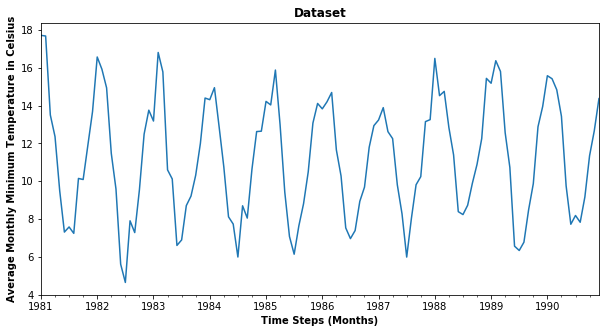

In [29]:
# Since data preprocessing has come to an end, the 'MonthlyMinTemp' plot is presented
data['MonthlyMinTemp'].plot(figsize=(10,5))
plt.ylabel('Average Monthly Minimum Temperature in Celsius',fontweight='bold')
plt.xlabel('Time Steps (Months)',fontweight='bold')
plt.title('Dataset',fontweight='bold');

In [30]:
# The length of the dataset is 120
data.shape

(120, 1)

# Part B

## Case Study I


### a) LSTM predictions - Comparison of actual (test_data) with predicted values

*In the first part of **Case Study I**, the aim is to take advantage of the LSTM model predictive capabilities to train this deep learning neural network with 9 years of past mean monthly data from the 'MonthlyMinTemp' feature (from 1981-01 to 1989-12) to predict the average minimum temperature values of the last 12 months (from 1990-01 to 1990-12). The one year mean monthly values of the feature comprise the test data that are to be used for the comparison of the predicted values with the actual values so as to evaluate the model predictive performance.*

In [31]:
# Test size: 12 months
test_size = 12
test_index = len(data)- test_size

In [32]:
# Dataset is split into training and test data
train = data.iloc[:test_index]
test = data.iloc[test_index:]

In [33]:
# Scaling the training and test data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [34]:
# Importing the keras library and the TimeseriesGenerator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [35]:
# Length can be considered as the number of entries that are to be used as inputs
# in order to determine/predict the next number in a sequence. 

# Number of features value is 1 as only one dataset feature is examined. The Date is not a feature as it comprises the index
# of the dataset (in Monthly Time steps)

# batch_size of value 1 has been selected, where at each batch 11 time series values are to be trained so as
# to predict the next number in the sequence
length = 11
n_features=1
time_series_generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [36]:
# First batch of the time_series_generator- train and test values
X,y=time_series_generator[0]

In [37]:
# At the first batch, the generator takes the first 11 values and trains them to predict the next number
X


array([[[1.        ],
        [0.99737343],
        [0.67769003],
        [0.59021882],
        [0.37092794],
        [0.2038664 ],
        [0.22458045],
        [0.19866732],
        [0.4208868 ],
        [0.4165844 ],
        [0.55451629]]])

In [38]:
# As it can be observed, the first 11 scaled training 'MonthlyMinTemp' values are the X input values
scaled_train[:11]

array([[1.        ],
       [0.99737343],
       [0.67769003],
       [0.59021882],
       [0.37092794],
       [0.2038664 ],
       [0.22458045],
       [0.19866732],
       [0.4208868 ],
       [0.4165844 ],
       [0.55451629]])

In [39]:
# The y value of the time_series_generator first batch corresponds to the 12th [index 11] value of the scaled train data
print(y)
print(scaled_train[11])

[[0.69151037]]
[0.69151037]


In [40]:
# Importing the necessary libraries to create/construct the neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras import initializers
import tensorflow as tf


# Use of the he_uniform initializer to set the initial random weights of the model layers. The bias initializer is set to a
# very small value (e.g. 0.01) to ensure that the neurons will fire at the beginning of the training process due to the use
# of a rectified linear unit as transfer (activation) function
initializer = tf.keras.initializers.he_uniform(seed=0)
# Initially, the network model is defined 
model = Sequential()

# Hidden layer neurons are chosen to be 11  which is equal to the defined length (number of past time series data per batch)
# Selected Activation function has been the rectified linear unit
model.add(LSTM(11, activation='relu', input_shape=(length, n_features),kernel_initializer=initializer,
                     bias_initializer=initializers.Constant(0.01)))
# The output layer consists of 1 neuron with a 'linear' activation fuction 
model.add(Dense(1,activation='linear',kernel_initializer=initializer,
                     bias_initializer=initializers.Constant(0.01)))
# The model is compiled with selected loss function= 'mse', whereas the selected optimizer is 'adam' with a learning rate
# of 0.001, epsilon=1e-8 and with the default values of the exponential decay rates for the first and
# second moment estimates
opt = tf.keras.optimizers.Adam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-8)

model.compile(optimizer=opt, loss='mse')

# A validation generator is constructed in a similar way to the previous time_series_generator with the only difference being
# the use of scaled_test values for validation purposes
time_series_val_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)

# Demonstration of EarlyStopping. LSTM training stops if the required conditions are met (e.g not improvement of the
# loss value for 10 consecutive epochs)
from tensorflow.keras.callbacks import EarlyStopping
Early_Stopping = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

# The model is ready to be trained for a maximum of 100 epochs. The training process is monitored and at each epoch both 
# training and validation losses can be observed due to the presence of the time_series_val_generator
model.fit_generator(time_series_generator,epochs=100,
                    validation_data=time_series_val_generator ,
                   callbacks=[Early_Stopping])

Epoch 1/100
97/97 [==============================] - 4s 41ms/step - loss: 0.1248 - val_loss: 0.1643
Epoch 2/100
97/97 [==============================] - 1s 9ms/step - loss: 0.0518 - val_loss: 0.0686
Epoch 3/100
97/97 [==============================] - 1s 10ms/step - loss: 0.0392 - val_loss: 0.0462
Epoch 4/100
97/97 [==============================] - 1s 9ms/step - loss: 0.0272 - val_loss: 0.0066
Epoch 5/100
97/97 [==============================] - 1s 9ms/step - loss: 0.0196 - val_loss: 0.0082
Epoch 6/100
97/97 [==============================] - 1s 10ms/step - loss: 0.0145 - val_loss: 0.0041
Epoch 7/100
97/97 [==============================] - 1s 9ms/step - loss: 0.0131 - val_loss: 0.0278
Epoch 8/100
97/97 [==============================] - 1s 9ms/step - loss: 0.0143 - val_loss: 0.0090
Epoch 9/100
97/97 [==============================] - 1s 10ms/step - loss: 0.0121 - val_loss: 0.0154
Epoch 10/100
97/97 [==============================] - 1s 9ms/step - loss: 0.0120 - val_loss: 0.0156
Epoch

Text(0, 0.5, "Loss-'MSE'")

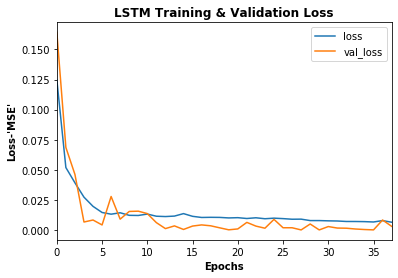

In [41]:
# Training and validation loss plots
loss = pd.DataFrame(model.history.history)
loss.plot()
plt.title('LSTM Training & Validation Loss',fontweight='bold')
plt.xlabel('Epochs',fontweight='bold')
plt.ylabel("Loss-'MSE'",fontweight='bold')

In [42]:
# Determining all LSTM Training values so as to compare them with the actual  dataset values used for the training process
training_outputs = []
batch = scaled_train[:length].reshape((1, length, n_features))

for i in range(len(scaled_train[length:])):
    train_out = model.predict(batch)[0]
    training_outputs.append(train_out) 
    batch = np.append(batch[:,1:,:],[[scaled_train[length:][i]]],axis=1)

In [43]:
# Creating a numpy array and applying the inverse_transform function to get the 97 actual training values. 
# 108 total training points - 11 the first batch sequence = 97
actual_train=scaled_train[length:]
actual_train=scaler.inverse_transform(actual_train)

In [44]:
# Applying the inverse_transform function to the training_outputs to get their mean MonthlyMinTemp values
train_predictions=scaler.inverse_transform(training_outputs)

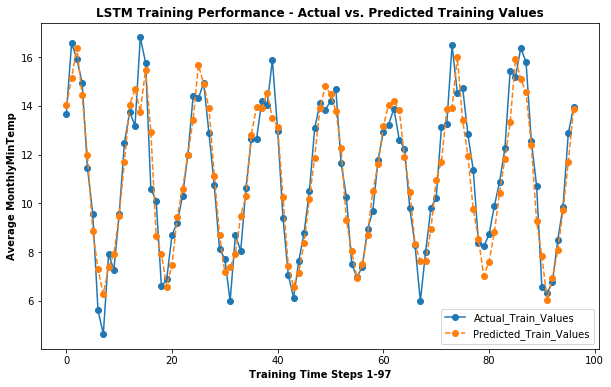

In [45]:
#'LSTM Training Performance - Actual vs. Predicted Training Values'
plt.figure(figsize=(10,6))
plt.plot(actual_train,marker='o',linestyle='-')

plt.plot(train_predictions,marker='o',linestyle='dashed')
plt.title('LSTM Training Performance - Actual vs. Predicted Training Values',fontweight='bold')
plt.legend(('Actual_Train_Values','Predicted_Train_Values'))
plt.xlabel('Training Time Steps 1-97',fontweight='bold')
plt.ylabel('Average MonthlyMinTemp',fontweight='bold');


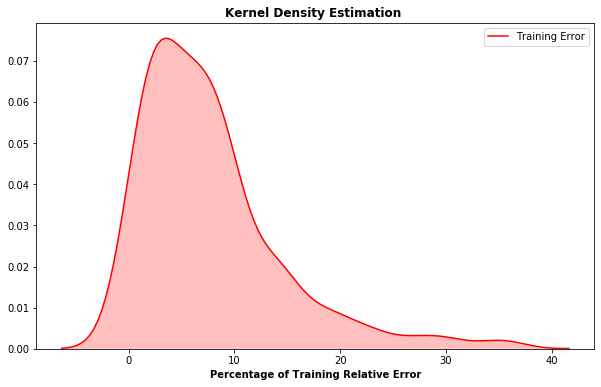

In [46]:
# Training relative Error Percentage distribution plot
train_err=abs((actual_train-train_predictions)/actual_train)*100
train_err=pd.DataFrame(train_err,columns=['Training Error'])
plt.figure(figsize=(10,6))
sns.kdeplot(train_err['Training Error'],shade=True,color='r',kernel='gau',)
plt.xlabel('Percentage of Training Relative Error',fontweight='bold')
plt.title('Kernel Density Estimation ',fontweight='bold');


In [47]:
# Summary statistics of training relative error

train_err.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Training Error,97.0,7.70087,6.678941,0.018567,2.810316,6.601181,9.542532,35.298303


In [48]:
# Determining all LSTM predicted values so as to compare them with the actual test values 
test_outputs = []
batch = scaled_train[-length:].reshape((1, length, n_features))

for i in range(len(test)):
    test_out = model.predict(batch)[0]
    test_outputs.append(test_out) 
    batch = np.append(batch[:,1:,:],[[test_out]],axis=1)


In [49]:
# Applying the inverse_transform function to the test_outputs to get their mean MonthlyMinTemp values
lstm_predictions = scaler.inverse_transform(test_outputs)

In [50]:
# A new test feature is created to comprise the LSTM test predictions
test['LSTM Predictions'] = lstm_predictions

C:\Users\geoto\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [51]:
# test(Actual) and LSTM Predictions
test

,MonthlyMinTemp,LSTM Predictions
Date,,
1990-01,15.577419,14.839524
1990-02,15.417857,15.173248
1990-03,14.835484,14.438244
1990-04,13.433333,12.216551
1990-05,9.748387,9.520334
1990-06,7.720000,7.374262
1990-07,8.183871,6.627506
1990-08,7.825806,7.263856
1990-09,9.166667,8.582771


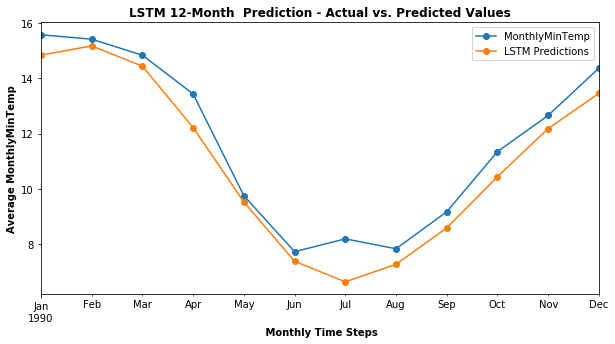

In [52]:
# Plot of the Test vs. Predicted results for a prediction horizon of 12 months (1990-01 to 1990-12)
test.plot(figsize=(10,5),marker='o',linestyle='-');
plt.title('LSTM 12-Month  Prediction - Actual vs. Predicted Values',fontweight='bold')
plt.ylabel('Average MonthlyMinTemp',fontweight='bold')
plt.xlabel(' Monthly Time Steps',fontweight='bold');

In [53]:
# LSTM training outputs index
train_index=pd.date_range(start='1981-12',periods=97,freq='MS')

In [54]:
# Converting the train_predictions from np.ndarray to pandas dataframe
train_df=pd.DataFrame(data=train_predictions,index=train_index,columns=['Predicted_Train'])

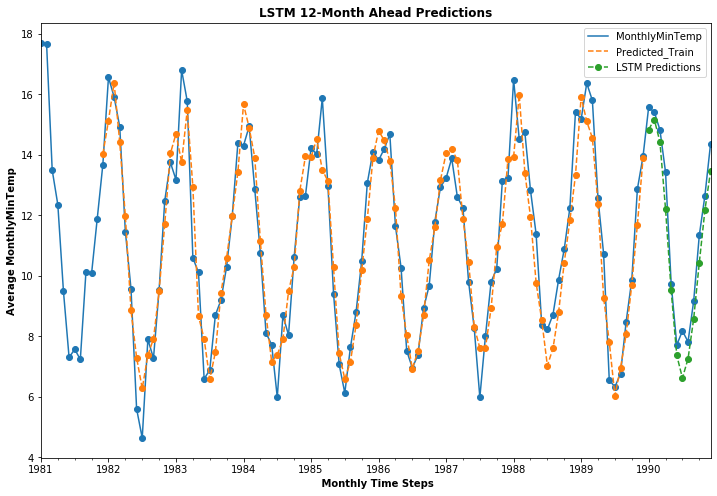

In [55]:
# Plot comprising all actual mean MonthlyMinTemp data, the LSTM model's training outputs and the LSTM test predictions
# The first 11 points are the initial time series samples of the first batch at the beginning of the training process.

ax=data.plot(figsize=(12,8),marker='o',linestyle='-')

train_df.plot(ax=ax,marker='o',linestyle='--')
test['LSTM Predictions'].plot(ax=ax,legend=True,marker='o',linestyle='dashed')
plt.title('LSTM 12-Month Ahead Predictions',fontweight='bold')
plt.ylabel('Average MonthlyMinTemp',fontweight='bold')
plt.xlabel(' Monthly Time Steps',fontweight='bold');





In [56]:
# Importing the metrics
from sklearn.metrics import mean_squared_error

In [57]:
# Root Mean Squared Error
print(np.sqrt(mean_squared_error(test['MonthlyMinTemp'],test['LSTM Predictions'])))

0.7838175300840421


# Case Study I


### b) LSTM forecast into the future

*In the second section of this case study, the aim is to take advantage of the LSTM model forecasting capabilities by training this deep learning neural network with all the past mean monthly data from the 'MonthlyMinTemp' feature (from 1981-01 to 1990-12) to forecast the mean minimum temperature values of the next 12 months (from 1991-01 to 1991-12). Since forecasting takes place into the 'future', the dataset does not contain the actual mean 'MonthlyMinTemp' values that would allow the evaluation of the model forecasting performance by comparing the forecasted and the actual mean monthly minimum temperature values.*

In [58]:
# The last 'MonthlyMinTemp' value of the dataset has date index value equal to 1990-12
data.tail(3)

,MonthlyMinTemp
Date,
1990-10,11.345161
1990-11,12.656667
1990-12,14.367742


In [59]:
# A new scaler is being initialized
data_scaler=MinMaxScaler()

In [60]:
# fit_transform function applied to all dataset's entries
scaled_set=data_scaler.fit_transform(data)

In [61]:
# A new TimeseriesGenerator is created to include the new scaled values, with batch_size = 1 of length=12
length=12
data_generator=TimeseriesGenerator(scaled_set,scaled_set,length=length,batch_size=1)

In [62]:
# The LSTM model is being constructed and compiled for the training process to take place
# Since the model forecasts into the future, in this case there are no validation data and no use of 
# keras callbacks ('EarlyStopping')

initializer = tf.keras.initializers.he_uniform(seed=0)
model=Sequential()
model.add(LSTM(12,activation='relu',input_shape=(length,n_features),kernel_initializer=initializer,
                     bias_initializer=initializers.Constant(0.01)))
model.add(Dense(1,activation='linear',kernel_initializer=initializer,
                     bias_initializer=initializers.Constant(0.01)))
model.compile(optimizer=opt,loss='mse')

model.fit_generator(data_generator,epochs=100)

Epoch 1/100
108/108 [==============================] - 3s 31ms/step - loss: 0.0367
Epoch 2/100
108/108 [==============================] - 1s 9ms/step - loss: 0.0147
Epoch 3/100
108/108 [==============================] - 1s 9ms/step - loss: 0.0099
Epoch 4/100
108/108 [==============================] - 1s 9ms/step - loss: 0.0092
Epoch 5/100
108/108 [==============================] - 1s 9ms/step - loss: 0.0090
Epoch 6/100
108/108 [==============================] - 1s 9ms/step - loss: 0.0083
Epoch 7/100
108/108 [==============================] - 1s 9ms/step - loss: 0.0077
Epoch 8/100
108/108 [==============================] - 1s 9ms/step - loss: 0.0078
Epoch 9/100
108/108 [==============================] - 1s 9ms/step - loss: 0.0073
Epoch 10/100
108/108 [==============================] - 1s 9ms/step - loss: 0.0078
Epoch 11/100
108/108 [==============================] - 1s 9ms/step - loss: 0.0072
Epoch 12/100
108/108 [==============================] - 1s 9ms/step - loss: 0.0070
Epoch 13/100

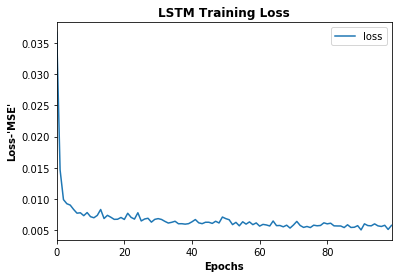

In [63]:
# Training Performance
loss=pd.DataFrame(model.history.history)
loss.plot()
plt.title('LSTM Training Loss',fontweight='bold')
plt.xlabel('Epochs',fontweight='bold')
plt.ylabel("Loss-'MSE'",fontweight='bold');

In [64]:
# Determining all LSTM Training values so as to compare them with the actual  dataset input values used for the training process
full_training_outputs = []
batch = scaled_set[:length].reshape((1, length, n_features))

for i in range(len(scaled_set[length:])):
    full_train_out = model.predict(batch)[0]
    full_training_outputs.append(full_train_out) 
    batch = np.append(batch[:,1:,:],[[scaled_set[length:][i]]],axis=1)

In [65]:
# Creating a numpy array and applying the inverse_transform function to get the 108 actual training values. 
# 120 total training points - 12 the first batch sequence = 108
f_train=scaled_set[length:]
f_train=scaler.inverse_transform(f_train)

In [66]:
# Applying the inverse_transform function to the training_outputs to get their mean MonthlyMinTemp values
f_train_predictions=scaler.inverse_transform(full_training_outputs)

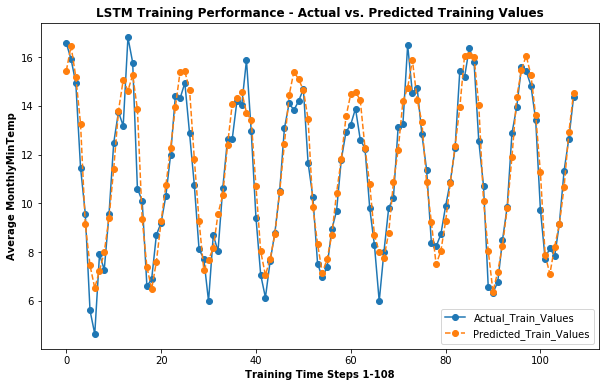

In [67]:
#'LSTM Training Performance - Actual vs. Predicted Training Values'
plt.figure(figsize=(10,6))
plt.plot(f_train,marker='o',linestyle='-')

plt.plot(f_train_predictions,marker='o',linestyle='dashed')
plt.title('LSTM Training Performance - Actual vs. Predicted Training Values',fontweight='bold')
plt.legend(('Actual_Train_Values','Predicted_Train_Values'))
plt.xlabel('Training Time Steps 1-108',fontweight='bold')
plt.ylabel('Average MonthlyMinTemp',fontweight='bold');


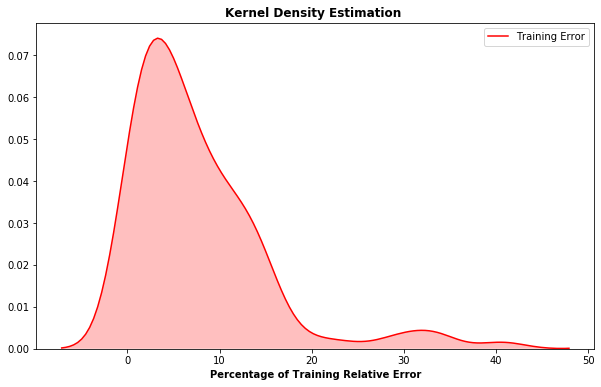

In [68]:
# Training Relative Error Percentage distribution plot
f_train_err=abs((f_train-f_train_predictions)/f_train)*100
f_train_err=pd.DataFrame(f_train_err,columns=['Training Error'])
plt.figure(figsize=(10,6))
sns.kdeplot(f_train_err['Training Error'],shade=True,color='r',kernel='gau',)
plt.xlabel('Percentage of Training Relative Error',fontweight='bold')
plt.title('Kernel Density Estimation ',fontweight='bold');

In [69]:
# Summary statistics of training_error. In this case the increase in the number of training points has led to a smaller 
# relative  percentage error mean value. Moreover, the fact that no callbacks have been set resulted in  LSTM training 
# for 100 epochs (38 epochs in the Case Study Ia), where the use of 'callbacks' has been demonstrated) and that led to 
# a more effective training of the deep learning model. 
f_train_err.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Training Error,108.0,7.616599,7.519511,0.093623,2.60479,5.823516,10.432253,40.669801


In [70]:
# LSTM training outputs index
f_train_index=pd.date_range(start='1982-01',periods=108,freq='MS')

In [71]:
# Converting the train_predictions from np.ndarray to pandas dataframe
f_train_df=pd.DataFrame(data=f_train_predictions,index=f_train_index,columns=['Predicted_Train'])

In [72]:
# Determining all LSTM forecasted values 
lstm_outputs=[]
batch = scaled_set[-length:].reshape((1, length, n_features))

for i in range(length):
    lstm_out = model.predict(batch)[0]
    lstm_outputs.append(lstm_out) 
    batch = np.append(batch[:,1:,:],[[lstm_out]],axis=1)

In [73]:
# Applying the inverse_transform function to get the mean 'MonthlyMinTemp' representations 
lstm_outputs=data_scaler.inverse_transform(lstm_outputs)
lstm_outputs

array([[15.72591421],
       [16.12472747],
       [15.67565431],
       [13.841293  ],
       [10.80027494],
       [ 8.18159204],
       [ 6.93361759],
       [ 7.38998946],
       [ 8.50289476],
       [ 9.99767862],
       [11.86365541],
       [13.83477435]])

In [74]:
# Index of forecasted mean 'MontlyMinTemp' values
lstm_forecast_index=pd.date_range(start='1991-01',periods=12,freq='MS')

In [75]:
# Converting the lstm_outputs from np.ndarray to pandas dataframe
lstm_forecast_df=pd.DataFrame(data=lstm_outputs,index=lstm_forecast_index,columns=['LSTM Forecasts'])
lstm_forecast_df

,LSTM Forecasts
1991-01-01,15.725914
1991-02-01,16.124727
1991-03-01,15.675654
1991-04-01,13.841293
1991-05-01,10.800275
1991-06-01,8.181592
1991-07-01,6.933618
1991-08-01,7.389989
1991-09-01,8.502895
1991-10-01,9.997679


Text(0.5, 0, ' Monthly Time Steps')

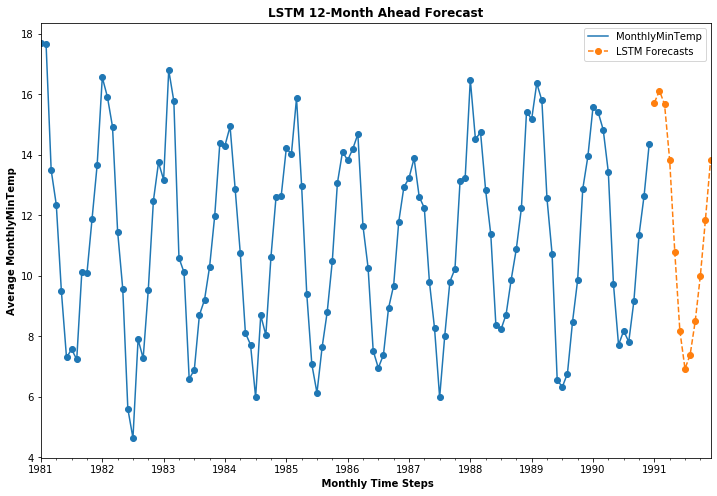

In [76]:
# Plot comprising all actual mean 'MonthlyMinTemp' data,and the 12-month LSTM forecasted values.

ax=data.plot(figsize=(12,8),marker='o',linestyle='-')
lstm_forecast_df.plot(ax=ax,marker='o',linestyle='--')
plt.title('LSTM 12-Month Ahead Forecast',fontweight='bold')
plt.ylabel('Average MonthlyMinTemp',fontweight='bold')
plt.xlabel(' Monthly Time Steps',fontweight='bold')


Text(0.5, 0, ' Monthly Time Steps')

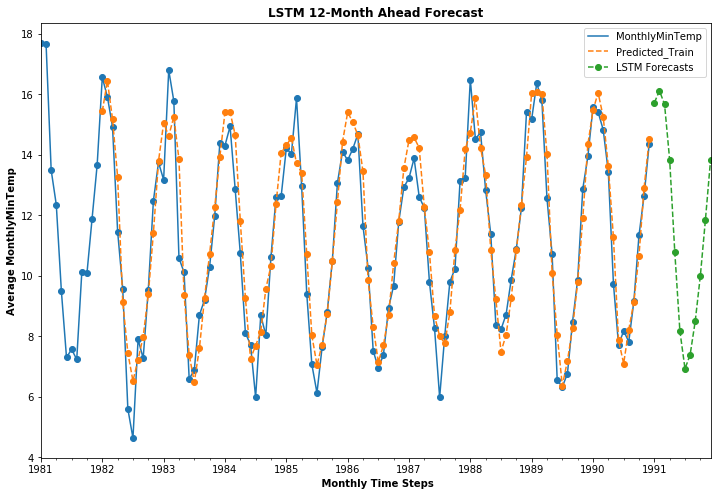

In [77]:
# Plot comprising all actual MonthlyMinTemp data, the LSTM model's training outputs,and the LSTM forecasts.
# The first 12 points are the initial time series samples of the first batch at the beginning of the training process.
ax=data.plot(figsize=(12,8),marker='o',linestyle='-')
f_train_df.plot(ax=ax,marker='o',linestyle='dashed')
lstm_forecast_df.plot(ax=ax,marker='o',linestyle='--')
plt.title('LSTM 12-Month Ahead Forecast',fontweight='bold')
plt.ylabel('Average MonthlyMinTemp',fontweight='bold')
plt.xlabel(' Monthly Time Steps',fontweight='bold')

# Case Study II

*In **Case Study II**, the aim is to take advantage of the LSTM model predictive capabilities by training this deep learning neural network with 8.5 years of past mean weekly data from the temperature feature to forecast the mean minimum temperature values of the next 1.5 year(78 weeks). These 1.5 year mean weekly records of the dataset comprise the test/target data that are to be used for the comparison of the predicted values with the actual values so as to assess the model predictive performance.*

In [78]:
# Copy of the initial dataset to convert the 'Date' column from 'object' data type to 'datetime', with the period set to Weeks
dataset_copy['Date'] = pd.to_datetime(dataset_copy['Date']).dt.to_period(freq='w')

In [79]:
# 'dataset' is renamed to 'data_w' and the dataset recorfd are grouped by 'Date' based on their mean weekly value
data_w=dataset_copy.groupby('Date').mean()

In [80]:
# Since the temperature column contains now Weekly Data, this column is renamed to 'WeeklyMinTemp'
data_w=data_w.rename(columns={'DailyMinTemp':'WeeklyMinTemp'})

In [81]:
# Dataset has been updated. 'Date' is the index column, and dataset feature is the  'WeeklyMinTemp' column
data_w.head()

,WeeklyMinTemp
Date,
1980-12-29/1981-01-04,18.000000
1981-01-05/1981-01-11,17.542857
1981-01-12/1981-01-18,20.371429
1981-01-19/1981-01-25,15.771429
1981-01-26/1981-02-01,16.657143


In [82]:
# As it can be observed, the index now contains Date values (per week)
data_w.index[:5]

PeriodIndex(['1980-12-29/1981-01-04', '1981-01-05/1981-01-11',
             '1981-01-12/1981-01-18', '1981-01-19/1981-01-25',
             '1981-01-26/1981-02-01'],
            dtype='period[W-SUN]', name='Date', freq='W-SUN')

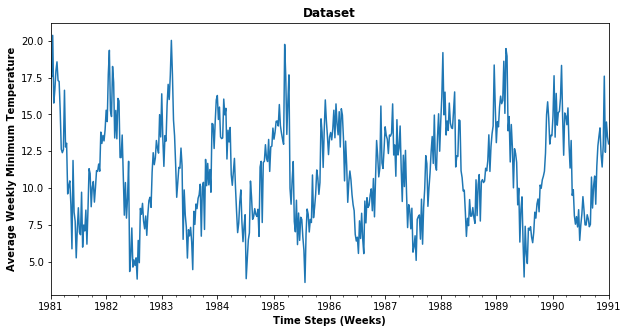

In [83]:
# The 'WeeklyMimimumTemp' plot is presented
data_w['WeeklyMinTemp'].plot(figsize=(10,5))
plt.ylabel('Average Weekly Minimum Temperature',fontweight='bold');
plt.xlabel('Time Steps (Weeks)',fontweight='bold')
plt.title('Dataset',fontweight='bold');

In [84]:
# The length of the dataset is 523
data_w.shape

(523, 1)

In [85]:
# Test size: 78 weeks (1.5 year)
w_test_size = 78
w_test_index = len(data_w)- w_test_size

In [86]:
# Dataset is split into training and test data
w_train = data_w.iloc[:w_test_index]
w_test = data_w.iloc[w_test_index:]

In [87]:
# Scaling the training and test data
from sklearn.preprocessing import MinMaxScaler
w_scaler = MinMaxScaler()
w_scaler.fit(w_train)
w_scaled_train = w_scaler.transform(w_train)
w_scaled_test = w_scaler.transform(w_test)

In [88]:
# Importing the keras library and the TimeseriesGenerator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [89]:
# Length defines the number of entries that are to be used as inputs
# in order to determine/predict the next number in a sequence. 

# Number of features value is 1 as only one dataset feature is examined. The Date is not a feature as it comprises the index
# of the dataset (in Weekly Time steps)

# batch_size of value 1 has been selected, where at each batch 26 time series values are to be trained so as
# to predict the next number in the sequence
length = 26
n_features=1
w_time_series_generator = TimeseriesGenerator(w_scaled_train, w_scaled_train, length=length, batch_size=1)

In [90]:
# Importing the necessary libraries to create/construct the neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras import initializers
import tensorflow as tf

# Use of the he_uniform initializer to set the initial random weights of the model layers. The bias initializer is set to a
# very small value (e.g. 0.01) to ensure that the neurons will fire at the beginning of the training process due to the use
# of a rectified linear unit as transfer (activation) function
initializer = tf.keras.initializers.he_uniform(seed=0)
# Initially, the network model is defined 
model = Sequential()

# Hidden layer neurons are chosen to be 26 equal to the defined length (number of past time series data per batch)
# Selected Activation function has been the rectified linear unit
model.add(LSTM(26, activation='relu', input_shape=(length, n_features),kernel_initializer=initializer,
                     bias_initializer=initializers.Constant(0.01)))
# The output layer consists of 1 neuron with a 'linear' activation fuction 
model.add(Dense(1,activation='linear',kernel_initializer=initializer,
                     bias_initializer=initializers.Constant(0.01)))
# The model is compiled with selected loss function= 'mse', whereas the selected optimizer is 'adam' with a learning rate
# of 0.0001, epsilon=1e-8 and with the default values of the exponential decay rates for the first and
# second moment estimates
opt = tf.keras.optimizers.Adam(learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-8)

model.compile(optimizer=opt, loss='mse')

# A validation generator is constructed in a similar way to the previous time_series_generator with the only difference being
# the use of scaled_test values for validation purposes
w_time_series_val_generator = TimeseriesGenerator(w_scaled_test,w_scaled_test, length=length, batch_size=1)

# Early Stopping to stop the training process if the required conditions are met (e.g not improvement of the
# loss value for 6 consecutive epochs)
from tensorflow.keras.callbacks import EarlyStopping
Early_Stopping = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=6)

# The model is ready to be trained for a maximum of 100 epochs. The training process is monitored and at each epoch both 
# training and validation losses can be observed due to the presence of the w_time_series_val_generator
model.fit_generator(w_time_series_generator,epochs=100,
                    validation_data=w_time_series_val_generator ,
                   callbacks=[Early_Stopping])

Epoch 1/100
419/419 [==============================] - 12s 27ms/step - loss: 0.5901 - val_loss: 0.1153
Epoch 2/100
419/419 [==============================] - 8s 19ms/step - loss: 0.0604 - val_loss: 0.0404
Epoch 3/100
419/419 [==============================] - 8s 19ms/step - loss: 0.0323 - val_loss: 0.0215
Epoch 4/100
419/419 [==============================] - 8s 19ms/step - loss: 0.0184 - val_loss: 0.0118
Epoch 5/100
419/419 [==============================] - 8s 19ms/step - loss: 0.0132 - val_loss: 0.0107
Epoch 6/100
419/419 [==============================] - 8s 20ms/step - loss: 0.0121 - val_loss: 0.0097
Epoch 7/100
419/419 [==============================] - 8s 20ms/step - loss: 0.0116 - val_loss: 0.0094
Epoch 8/100
419/419 [==============================] - 8s 19ms/step - loss: 0.0111 - val_loss: 0.0090
Epoch 9/100
419/419 [==============================] - 8s 19ms/step - loss: 0.0108 - val_loss: 0.0090
Epoch 10/100
419/419 [==============================] - 8s 19ms/step - loss: 0.01

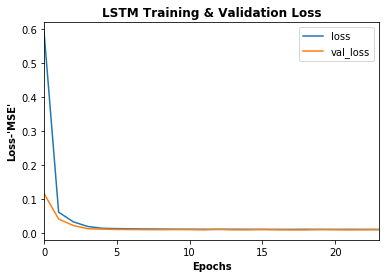

In [113]:
# Training and validation loss plots
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.title('LSTM Training & Validation Loss',fontweight='bold')
plt.xlabel('Epochs',fontweight='bold')
plt.ylabel("Loss-'MSE'",fontweight='bold');

In [92]:
# Determining all LSTM Training values so as to compare them with the actual  dataset input values used for training process
w_training_outputs = []
batch = w_scaled_train[:length].reshape((1, length, n_features))

for i in range(len(w_scaled_train[length:])):
    w_train_out = model.predict(batch)[0]
    w_training_outputs.append(w_train_out) 
    batch = np.append(batch[:,1:,:],[[w_scaled_train[length:][i]]],axis=1)

In [93]:
# Creating a numpy array and applying the inverse_transform function to get the 419 target training values. 
# 445 total training points - 26 the first batch sequence = 419
w_actual_train=w_scaled_train[length:]
w_actual_train=w_scaler.inverse_transform(w_actual_train)

In [94]:
# Applying the inverse_transform function to the training_outputs to get their average WeeklyMinTemp values
w_train_predictions=w_scaler.inverse_transform(w_training_outputs)

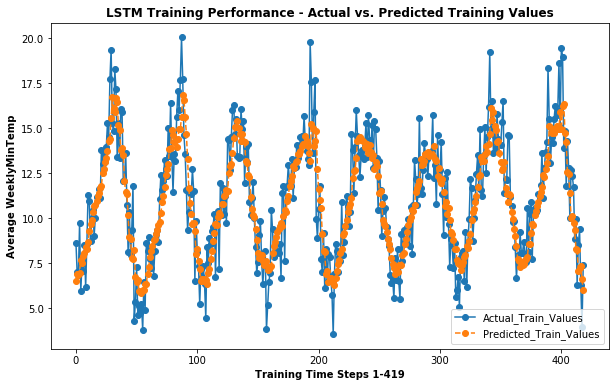

In [112]:
#'LSTM Training Performance - Target vs. Predicted Training Values'
plt.figure(figsize=(10,6))
plt.plot(w_actual_train,marker='o',linestyle='-')

plt.plot(w_train_predictions,marker='o',linestyle='dashed')
plt.title('LSTM Training Performance - Actual vs. Predicted Training Values',fontweight='bold')
plt.legend(('Actual_Train_Values','Predicted_Train_Values'))
plt.xlabel('Training Time Steps 1-419',fontweight='bold')
plt.ylabel('Average WeeklyMinTemp',fontweight='bold');


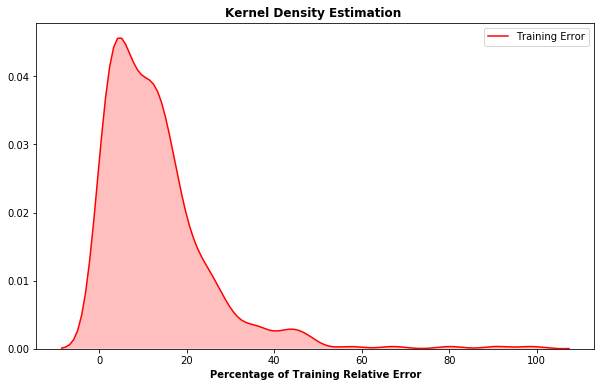

In [111]:
# Training Relative Error Percentage distribution plot
w_train_err=abs((w_actual_train-w_train_predictions)/w_actual_train)*100
w_train_err=pd.DataFrame(w_train_err,columns=['Training Error'])
plt.figure(figsize=(10,6))
sns.kdeplot(w_train_err['Training Error'],shade=True,color='r',kernel='gau',)
plt.xlabel('Percentage of Training Relative Error',fontweight='bold')
plt.title('Kernel Density Estimation ',fontweight='bold');


In [97]:
# Summary statistics of relative percentage training_error

w_train_err.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Training Error,419.0,12.955136,12.392915,0.034825,4.614141,10.816447,16.914621,98.732846


In [98]:
# Determining all LSTM predicted values so as to compare them with the actual test values 
test_outputs = []
batch = w_scaled_train[-length:].reshape((1, length, n_features))

for i in range(78):
    test_out = model.predict(batch)[0]
    test_outputs.append(test_out) 
    batch = np.append(batch[:,1:,:],[[test_out]],axis=1)


In [99]:
# Applying the inverse_transform function to the test_outputs to get their Average WeeklyMinTemp values
lstm_predictions = w_scaler.inverse_transform(test_outputs)

In [100]:
# A new test feature is created to comprise the LSTM test predictions
w_test['LSTM Predictions'] = lstm_predictions

C:\Users\geoto\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [101]:
# test(Actual) and LSTM Predictions
w_test.head()

,WeeklyMinTemp,LSTM Predictions
Date,,
1989-07-10/1989-07-16,5.542857,6.499571
1989-07-17/1989-07-23,4.871429,6.363764
1989-07-24/1989-07-30,7.271429,6.421013
1989-07-31/1989-08-06,7.142857,6.570622
1989-08-07/1989-08-13,7.371429,6.772408


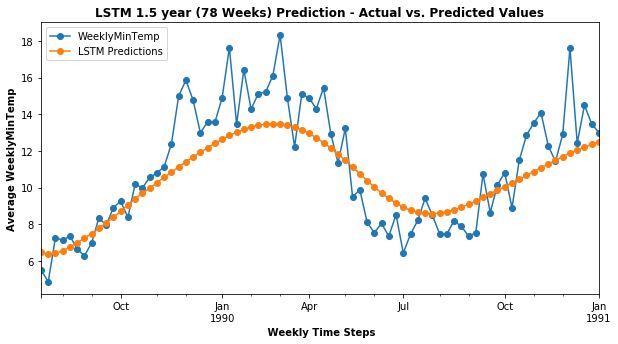

In [102]:
# Plot of the Test vs. Predicted results for a prediction horizon of 1.5 year (78 weeks)
w_test.plot(figsize=(10,5),marker='o',linestyle='-');
plt.title('LSTM 1.5 year (78 Weeks) Prediction - Actual vs. Predicted Values',fontweight='bold')
plt.ylabel('Average WeeklyMinTemp',fontweight='bold')
plt.xlabel(' Weekly Time Steps',fontweight='bold');

In [103]:
# the first target training value from the time series generator is to be the starting index of the training outputs index
data_w.iloc[26]

WeeklyMinTemp    8.657143
Name: 1981-06-29/1981-07-05, dtype: float64

In [104]:
# Training index is total training points - first input batch = 445 - 26= 419
w_train.shape

(445, 1)

In [105]:
# LSTM training outputs index
train_index=pd.date_range(start='1981-06-29',periods=419,freq='w')

In [106]:
# Converting the train_predictions from np.ndarray to pandas dataframe
train_df=pd.DataFrame(data=w_train_predictions,index=train_index,columns=['Predicted_Train'])

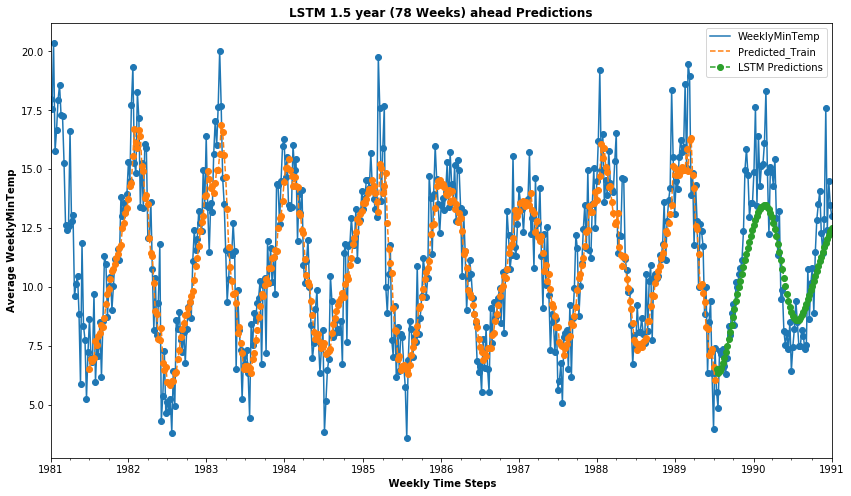

In [107]:
# Plot comprising all actual WeeklyMinTemp data, the LSTM model's training outputs and the LSTM test predictions
# The first 26 points are the initial time series samples of the first batch at the beginning of the training process.
ax=data_w.plot(figsize=(14,8),marker='o',linestyle='-')
train_df.plot(ax=ax,marker='o',linestyle='--')
w_test['LSTM Predictions'].plot(ax=ax,legend=True,marker='o',linestyle='dashed')
plt.title('LSTM 1.5 year (78 Weeks) ahead Predictions',fontweight='bold')
plt.ylabel('Average WeeklyMinTemp',fontweight='bold')
plt.xlabel(' Weekly Time Steps',fontweight='bold');


In [108]:
# Importing the metrics
from sklearn.metrics import mean_squared_error

In [109]:
# Root Mean Squared Error
print(np.sqrt(mean_squared_error(w_test['WeeklyMinTemp'],w_test['LSTM Predictions'])))

1.8693762603921331
